In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.layers import *
from keras.utils import *
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import *
%matplotlib inline

Using TensorFlow backend.


In [5]:

'''
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

'''

df = pd.read_csv('iris.data', names=['sl','sw','pl','pw','class'], index_col=False)

df.head(150)

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.describe()

,sl,sw,pl,pw
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
'''
mean 평균
std : 표준 편차
'''

#String 으로 되어있는 클래스들을 0,1,2...로 변경한다.
Y = LabelEncoder().fit_transform(df['class'])
Y = to_categorical(Y)

X = df.drop('class', axis=1)
X.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:

X_train = X[:-5]
X_test = X[-5:]

Y_train = Y[:-5]
Y_test = Y[-5:]

In [30]:
model = Sequential()
#input_shape 는 피쳐의 갯수를 넣어준다 (속성값 4개)
model.add(Dense(256,  activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

#adam (optimizer)
#metrics - 모델이 accuracy(정답 확률) 값도 계산하라는 명령어 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 99        
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Train on 130 samples, validate on 15 samples
Epoch 1/100
130/130 [==============================] - 0s 1ms/step - loss: 1.0270 - accuracy: 0.5923 - val_loss: 1.1327 - val_accuracy: 0.0000e+00
Epoch 2/100
130/130 [==============================] - 0

Epoch 51/100
130/130 [==============================] - 0s 92us/step - loss: 0.0687 - accuracy: 0.9692 - val_loss: 0.4124 - val_accuracy: 0.7333
Epoch 52/100
130/130 [==============================] - 0s 97us/step - loss: 0.1354 - accuracy: 0.9462 - val_loss: 0.6225 - val_accuracy: 0.6667
Epoch 53/100
130/130 [==============================] - 0s 64us/step - loss: 0.0803 - accuracy: 0.9538 - val_loss: 0.0752 - val_accuracy: 1.0000
Epoch 54/100
130/130 [==============================] - 0s 74us/step - loss: 0.0818 - accuracy: 0.9769 - val_loss: 0.1674 - val_accuracy: 1.0000
Epoch 55/100
130/130 [==============================] - 0s 71us/step - loss: 0.0791 - accuracy: 0.9615 - val_loss: 0.3213 - val_accuracy: 0.7333
Epoch 56/100
130/130 [==============================] - 0s 57us/step - loss: 0.0659 - accuracy: 0.9692 - val_loss: 0.1459 - val_accuracy: 1.0000
Epoch 57/100
130/130 [==============================] - 0s 83us/step - loss: 0.0673 - accuracy: 0.9846 - val_loss: 0.2070 - val_ac

Text(0.5, 1.0, 'loss')

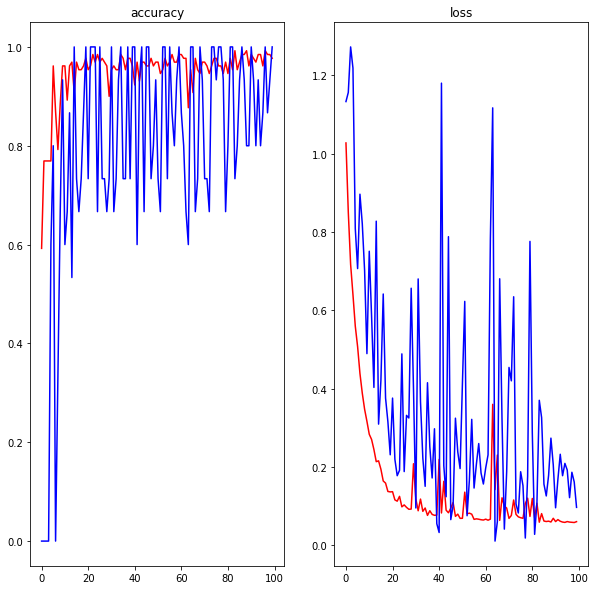

In [31]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('accuracy')

plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

In [32]:
score = model.evaluate(X_test, Y_test)
print(score)

pred = model.predict(X_test)
print(pred)
print(Y_test)

5/5 [==============================] - 0s 448us/step
[0.022995341569185257, 1.0]
[[5.53465861e-06 1.45379305e-02 9.85456526e-01]
 [8.93174183e-06 1.56418271e-02 9.84349191e-01]
 [1.85242843e-05 4.74103577e-02 9.52571094e-01]
 [4.56569751e-06 6.95986347e-03 9.93035495e-01]
 [2.00830455e-05 2.85367835e-02 9.71443176e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
